In [70]:
%matplotlib inline

import pandas as pd
import datetime
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import hvplot.pandas
from sklearn.utils import shuffle

Read in the data from the files

In [61]:
cleaned = pd.read_pickle("8536110_cm_raw_ver_merged_wl_Cleaned")
features = pd.read_pickle("8536110_cm_raw_ver_merged_wl_Features")
targets = pd.read_pickle("8536110_cm_raw_ver_merged_wl_Target")

cleaned['goodPts']=targets['goodPts']



cleaned.head()

,time,primary,sigma,backup,verified,prediction,goodPts
0,2007-01-01 00:00:00,0.459,0.006,0.446,0.459,0.385,1
1,2007-01-01 00:06:00,0.437,0.005,0.425,0.437,0.365,1
2,2007-01-01 00:12:00,0.400,0.006,0.388,0.400,0.344,1
3,2007-01-01 00:18:00,0.376,0.006,0.363,0.376,0.321,1
4,2007-01-01 00:24:00,0.354,0.006,0.342,0.354,0.297,1


In [62]:
cleaned.set_index('time', inplace = True)

In [63]:
cleaned.head()

,primary,sigma,backup,verified,prediction,goodPts
time,,,,,,
2007-01-01 00:00:00,0.459,0.006,0.446,0.459,0.385,1
2007-01-01 00:06:00,0.437,0.005,0.425,0.437,0.365,1
2007-01-01 00:12:00,0.400,0.006,0.388,0.400,0.344,1
2007-01-01 00:18:00,0.376,0.006,0.363,0.376,0.321,1
2007-01-01 00:24:00,0.354,0.006,0.342,0.354,0.297,1


Break up into training and test sections, training from 2012:2013 and test from 2014:2015

In [64]:
cmTrain = cleaned.loc['2012-01-01 00:00:00':'2013-12-31 23:54:00']
cmTest = cleaned.loc['2014-01-01 00:00:00':'2015-12-31 23:54:00']

Shuffle the individual training and testing sections to aid with NN fit

In [74]:
cmTrainRand=shuffle(cmTrain)
cmTestRand=shuffle(cmTest)
cmTestRand.head()

,primary,sigma,backup,verified,prediction,goodPts
time,,,,,,
2015-04-17 17:06:00,-0.882,0.004,-0.884,-0.882,-0.870,1
2014-10-01 15:12:00,0.432,0.006,0.434,0.432,0.148,1
2015-07-02 21:12:00,-0.276,0.007,-0.284,-0.276,-0.459,1
2014-02-12 17:00:00,-0.491,0.005,-0.499,-0.491,-0.631,1
2014-01-12 05:42:00,-0.369,0.008,-0.397,-0.369,-0.600,1


In [86]:
featureTrain=cmTrainRand.loc[:,['primary','sigma','backup','prediction']]
featureTest=cmTestRand.loc[:,['primary','sigma','backup','prediction']]

targetTrain=cmTrainRand.loc[:,['goodPts']]
targetTest=cmTestRand.loc[:,['goodPts']]

predictFeatures = cmTest.loc[:,['primary','sigma','backup','prediction']]


Set up the keras NN model

In [75]:
from keras.models import Sequential
from keras.layers import Dense, Activation

Using TensorFlow backend.
/srv/conda/envs/notebook/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/srv/conda/envs/notebook/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/srv/conda/envs/notebook/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/srv/conda/envs/notebook/lib/python3.7/site-packag

In [76]:
# For a single-input model with 2 classes (binary classification):

model = Sequential()
model.add(Dense(16, activation='relu', input_dim=4))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.


In [83]:
# Train the model, iterating on the data in batches of 64 samples
history = model.fit(featureTrain, targetTrain, epochs=10, batch_size=64, validation_data=(featureTest, targetTest))

Instructions for updating:
Use tf.cast instead.
Train on 145928 samples, validate on 173524 samples
Epoch 1/10
145928/145928 [==============================] - 7s 49us/step - loss: 0.0464 - acc: 0.9949 - val_loss: 0.1302 - val_acc: 0.9633
Epoch 2/10
145928/145928 [==============================] - 7s 46us/step - loss: 0.0206 - acc: 0.9969 - val_loss: 0.1147 - val_acc: 0.9756
Epoch 3/10
145928/145928 [==============================] - 7s 45us/step - loss: 0.0204 - acc: 0.9970 - val_loss: 0.1012 - val_acc: 0.9786
Epoch 4/10
145928/145928 [==============================] - 6s 43us/step - loss: 0.0203 - acc: 0.9970 - val_loss: 0.0953 - val_acc: 0.9803
Epoch 5/10
145928/145928 [==============================] - 7s 50us/step - loss: 0.0202 - acc: 0.9970 - val_loss: 0.0939 - val_acc: 0.9808
Epoch 6/10
145928/145928 [==============================] - 7s 45us/step - loss: 0.0199 - acc: 0.9970 - val_loss: 0.0913 - val_acc: 0.9813
Epoch 7/10
145928/145928 [==============================] - 6s 43u

In [84]:
#Evaulate the model
eval_model=model.evaluate(featureTest, targetTest)
eval_model

173524/173524 [==============================] - 3s 16us/step


[0.10129512335588535, 0.984693759940988]

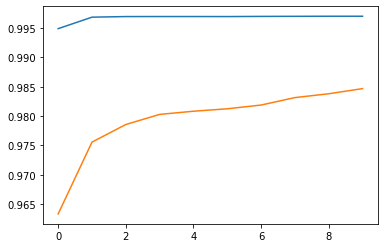

In [85]:
#Plot the NN accuracy over each epoch
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

In [87]:
#Generate predictions for the test period
modelPrediction = model.predict(predictFeatures, batch_size=32)

In [90]:
np.shape(modelPrediction)

(173524, 1)

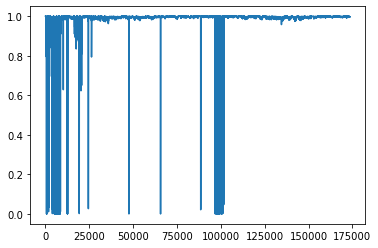

In [91]:
plt.plot(modelPrediction)